### T-test 

In [94]:
# from __future__ import print_function, division
from tqdm import tqdm_notebook as tqdm
import numpy as np
import os
import sys
import pandas as pd
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from keras_bert import load_vocabulary
import matplotlib.pyplot as plt

from scipy.stats import t
from scipy import stats
    
from methods.preprocessing import Preprocess
from methods.baseline import Baseline
from methods.retrieval import Retrieval
from approaches.deepQL_topics import run as deepql_topics_run

import _pickle as pickle

from methods.evaluation import Evaluation, EvaluationPrecision, EvaluationRecall, EvaluationFscore

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

In [53]:
DOMAIN = "openoffice"
PREPROCESSING = 'bert'
TOKEN = 'bert'
normalized = os.path.join('data/normalized', DOMAIN, '{}.csv'.format(DOMAIN))
DIR = 'data/processed/{}/{}'.format(DOMAIN, PREPROCESSING)
for TEST in [['deepQL_topics', 'deepTL_topics']]:
    recall = {}
    for MODEL in TEST:
        RANK =  os.path.join('data/processed', DOMAIN, TOKEN, 'exported_rank_{}_1000.txt'.format(MODEL))
        evaluate = Evaluation(0)
        evaluate.evaluate(RANK)
        report = evaluate.get_recalls()
        recall[MODEL] = report
recall

{'deepQL_topics': {'0 - recall_at_1': [1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   1.0,
   1.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   1.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   1.0,
   0.0,
   1.0,
   1.0,
   1.0,
   0.0,
   0.0,
   0.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.0,
   0.0,
   1.0,
   0.0,
   1.0,
   0.0,
   1.0,
   1.0,
   1.0,
   0.0,
   1.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   1.0,
   0.0,
   1.0,
   1.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   1.0,
   0.0,
   0.0,
   1.0,
   0.0,
   1.0,
   1.0,
   1.0,
   0.0,
   0.0,
   0.0,
   1

In [63]:
position = '0'
recall_at = '1'
y_train = np.array(range(len(recall['deepQL_topics']['{} - recall_at_{}'.format(position, recall_at)])))
y_test = np.array(range(len(recall['deepTL_topics']['{} - recall_at_{}'.format(position, recall_at)])))
A_score = np.array(recall['deepQL_topics']['{} - recall_at_{}'.format(position, recall_at)])
B_score = np.array(recall['deepTL_topics']['{} - recall_at_{}'.format(position, recall_at)])


y = np.concatenate([y_train, y_test])

(array([6364.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0., 5393.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <a list of 15 Patch objects>)

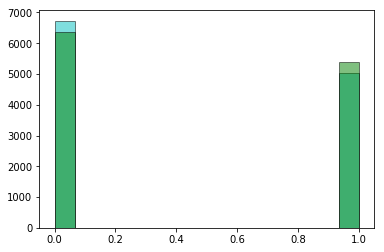

In [64]:
plt.hist(A_score, bins=15, color='c', edgecolor='k', alpha=0.5)
plt.hist(B_score, bins=15, color='g', edgecolor='k', alpha=0.5)

In [65]:
_, Pvalue = stats.ttest_rel(A_score, B_score)
# Compouter diferrence value between scores 
Dvalue = round(np.mean(A_score - B_score), 2)
print("Diference score", Dvalue)
print("P-value", Pvalue)
print("reject null hypothesis", Pvalue < 0.05)

Diference score -0.03
P-value 1.2209045123694927e-14
reject null hypothesis True


In [66]:
_, Pvalue = stats.wilcoxon(A_score, B_score)
# Compouter diferrence value between scores 
Dvalue = round(np.mean(A_score - B_score), 2)
print("Diference score", Dvalue)
print("P-value", Pvalue)
print("reject null hypothesis", Pvalue < 0.05)

Diference score -0.03
P-value 1.3127710449836274e-14
reject null hypothesis True


In [67]:
dup_method_A = [x for x in A_score if x == 1.0]
dup_method_B = [x for x in B_score if x == 1.0]

qtd_dup_method_A = len(dup_method_A)
qtd_dup_method_B = len(dup_method_B)
qtd_non_dup_method_A = len(A_score) - qtd_dup_method_A
qtd_non_dup_method_B = len(B_score) - qtd_dup_method_B

# A_score_table = [qtd_non_dup_method_A / len(A_score), qtd_dup_method_A / len(A_score)]
# B_score_table = [qtd_non_dup_method_B / len(B_score), qtd_dup_method_B / len(B_score)]

A_score_table = np.array([qtd_dup_method_A, qtd_non_dup_method_A], float)
B_score_table = np.array([qtd_dup_method_B, qtd_non_dup_method_B], float)

A_score_table, B_score_table

(array([5026., 6731.]), array([5393., 6364.]))

In [68]:
_, Pvalue = stats.fisher_exact([A_score_table, B_score_table], alternative='two-sided')
# Compouter diferrence value between scores 
Dvalue = round(np.mean(A_score - B_score), 2)
print("Diference score", Dvalue)
print("P-value", Pvalue)
print("reject null hypothesis", Pvalue < 0.05)

Diference score -0.03
P-value 1.5457214673558431e-06
reject null hypothesis True


In [69]:
_, Pvalue = stats.chisquare(A_score_table, B_score_table)
# Compouter diferrence value between scores 
Dvalue = round(np.mean(A_score - B_score), 2)
print("Diference score", Dvalue)
print("P-value", Pvalue)
print("reject null hypothesis", Pvalue < 0.05)

Diference score -0.03
P-value 1.101544712566169e-11
reject null hypothesis True


## Calculate statistical results for retrieval

In [83]:
# DOMAIN = "openoffice"
PREPROCESSING = 'bert'
TOKEN = 'bert'
normalized = os.path.join('data/normalized', DOMAIN, '{}.csv'.format(DOMAIN))
DIR = 'data/processed/{}/{}'.format(DOMAIN, PREPROCESSING)

result = []

for DOMAIN in ['eclipse', 'netbeans', 'openoffice']:

    for TEST in [['deepQL_topics', 'deepTL_topics'], ['deepQL_topics', 'deepTL'], ['deepQL_topics', 'deepQL_no_trainable'], 
                ['deepQL_topics', 'deepQL_trainable'], ['deepQL_topics', 'baseline'], ['deepQL_topics', 'baseline_dwen']]:
        recall = {}
        for MODEL in TEST:
            RANK =  os.path.join('data/processed', DOMAIN, TOKEN, 'exported_rank_{}_1000.txt'.format(MODEL))
            evaluate = Evaluation(0)
            evaluate.evaluate(RANK)
            report = evaluate.get_recalls()
            recall[MODEL] = report

        for position, recall_at in enumerate(['1', '5', '10', '15', '20', '25']):
            method_a, method_b = TEST
            y_train = np.array(range(len(recall[method_a]['{} - recall_at_{}'.format(position, recall_at)])))
            y_test = np.array(range(len(recall[method_b]['{} - recall_at_{}'.format(position, recall_at)])))
            A_score = np.array(recall[method_a]['{} - recall_at_{}'.format(position, recall_at)])
            B_score = np.array(recall[method_b]['{} - recall_at_{}'.format(position, recall_at)])


            y = np.concatenate([y_train, y_test])

            Dvalue = round(np.mean(A_score - B_score), 2)

            # T-test
            _, Pvalue = stats.ttest_rel(A_score, B_score)
            result.append([method_a, method_b, recall_at, Pvalue < 0.05, Pvalue, Dvalue, 't-test', DOMAIN])
        
df = pd.DataFrame(result, columns=['A', 'B', 'recall_at', 'significant', 'p_value', 'd_value', 'test', 'domain'])

In [84]:
df

,A,B,recall_at,significant,p_value,d_value,test,domain
0,deepQL_topics,deepTL_topics,1,True,3.290719e-06,0.01,t-test,eclipse
1,deepQL_topics,deepTL_topics,5,True,2.384715e-05,0.01,t-test,eclipse
2,deepQL_topics,deepTL_topics,10,True,8.202227e-04,0.01,t-test,eclipse
3,deepQL_topics,deepTL_topics,15,True,1.769518e-04,0.01,t-test,eclipse
4,deepQL_topics,deepTL_topics,20,True,8.630666e-04,0.01,t-test,eclipse
5,deepQL_topics,deepTL_topics,25,True,1.465201e-03,0.01,t-test,eclipse
6,deepQL_topics,deepTL,1,True,2.632420e-42,0.04,t-test,eclipse
7,deepQL_topics,deepTL,5,True,6.446604e-55,0.05,t-test,eclipse
8,deepQL_topics,deepTL,10,True,1.215722e-54,0.05,t-test,eclipse
9,deepQL_topics,deepTL,15,True,1.915755e-56,0.05,t-test,eclipse


## Calculate statistical results for classification

In [92]:
def load_result(name):
    with open(os.path.join(DIR,'{}.pkl'.format(name)), 'rb') as f:
        return pickle.load(f)

In [99]:
# DOMAIN = "openoffice"
PREPROCESSING = 'bert'
TOKEN = 'bert'
normalized = os.path.join('data/normalized', DOMAIN, '{}.csv'.format(DOMAIN))
DIR = 'data/processed/{}/{}'.format(DOMAIN, PREPROCESSING)

result = []

for DOMAIN in ['openoffice']: #'eclipse', 'netbeans',

    for TEST in [['deepQL_topics', 'deepTL_topics']]:
        acc = {}
        for MODEL in TEST:
            
            name = '{}_1000_classification'.format(MODEL)
            report = load_result(name)
            
            acc[MODEL] = report['acc']

        method_a, method_b = TEST
        y_train = np.array(range(len(acc[method_a])))
        y_test = np.array(range(len(acc[method_b])))
        A_score = np.array(acc[method_a])
        B_score = np.array(acc[method_b])
            
        y = np.concatenate([y_train, y_test])

        Dvalue = round(np.mean(A_score - B_score), 2)

        # T-test
        _, Pvalue = stats.ttest_rel(A_score, B_score)
        result.append([method_a, method_b, Pvalue < 0.05, Pvalue, Dvalue, 't-test', DOMAIN])
        
df = pd.DataFrame(result, columns=['A', 'B', 'significant', 'p_value', 'd_value', 'test', 'domain'])

In [100]:
df

,A,B,significant,p_value,d_value,test,domain
0,deepQL_topics,deepTL_topics,False,0.217501,0.0,t-test,openoffice
